In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly
from plotly.offline import plot, iplot
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
iplauction = pd.read_csv("IPLPlayerAuctionData.csv")
iplauction

,Player,Role,Amount,Team,Year,Player Origin
0,Aaron Finch,Batsman,40000000,Sunrisers Hyderabad,2014.0,Overseas
1,Aaron Finch,Batsman,32000000,Mumbai Indians,2015.0,Overseas
2,Aaron Finch,Batsman,10000000,Gujarat Lions,2016.0,Overseas
3,Aaron Finch,Batsman,62000000,Kings XI Punjab,2018.0,Overseas
4,Aaron Finch,Batsman,44000000,Royal Challengers Bangalore,2020.0,Overseas
...,...,...,...,...,...,...
965,Yuzvendra Singh Chahal,Bowler,1000000,Royal Challengers Bangalore,2014.0,Indian
966,Yuzvendra Singh Chahal,Bowler,60000000,Royal Challengers Bangalore,2018.0,Indian
967,Zaheer Khan,Bowler,26000000,Mumbai Indians,2014.0,Indian
968,Zaheer Khan,Bowler,40000000,Delhi Daredevils,2015.0,Indian


In [23]:
iplauction.isnull().sum()
iplauction.dropna(inplace=True)
iplauction.Year = iplauction.Year.apply(int)
iplauction.Amount = iplauction.Amount.apply(int)

In [24]:
data = iplauction.groupby('Year')['Amount'].sum()
fig = px.line(data, x = data.index, y = 'Amount', title = "Overall Expense Each year", text=data.index)
fig.update_traces(textposition="top right")
fig.show()
#print(data.head())
#data['Amount'] = data['Amount'].div(10000000).round(0)
data = data.div(10000000)
fig = px.bar(data, x = data.index, y = 'Amount', title = "Overall Expense Each year (in Crores)",
             text= 'Amount',color=data.index)
fig.show()


In [6]:
data = iplauction[['Player','Amount','Year']].sort_values("Amount", axis = 0, ascending = False)[:10]
data

,Player,Amount,Year
187,Christopher Morris,162500000,2021
960,Yuvraj Singh,160000000,2015
632,Pat Cummins,155000000,2020
311,Ishan Kishan,152500000,2022
455,Kyle Jamieson,150000000,2021
137,Benjamin Stokes,145000000,2017
280,Glenn Maxwell,142500000,2021
222,Deepak Chahar,140000000,2022
368,Jhye Richardson,140000000,2021
959,Yuvraj Singh,140000000,2014


In [7]:
fig =px.bar(data.head(100), y="Player", x="Amount", color='Year',orientation='h',text='Amount', height=600)
fig.update_layout(title_text = "Top-10 Auction Buys")
fig.show()

In [8]:
data = iplauction[['Player','Amount','Year']].sort_values("Amount", axis = 0, ascending = False)
#data = data[:20].sort("Amount",ascending=0)
#print(data.head())
fig =px.bar(data.head(100), y="Player", x="Amount", color='Year',orientation='h',text='Amount', height=2000)
fig.update_layout(title_text = "Top-100 Auction Buys")
fig.show()


In [9]:
data = pd.DataFrame(iplauction.groupby(['Team', 'Year'])['Amount'].sum()).reset_index()
data =data.sort_values(by='Amount', ascending=False,
               key=lambda x: data['Year'].groupby(x).transform('sum'))
#print(data.head())
fig = px.bar(data, x='Team', y='Amount', color='Year')#, symbol='Team')
fig.update_layout(title_text = "Overall comparision of different team spends")
fig.show()

In [10]:
data = pd.DataFrame(iplauction.groupby(['Team', 'Year'])['Amount'].sum()).reset_index()
fig = px.bar(data, x='Year', y='Amount', color='Team')#, symbol='Team')
fig.update_layout(title_text = "Overall comparision of different team spends")
fig.show()

In [11]:
teams = iplauction.Team.unique()[:5]
import plotly.graph_objects as go
for team in teams:
    data = iplauction[iplauction['Team'] == team].groupby('Year')['Amount'].sum().to_frame('Amount').reset_index()
    fig = px.line(data, x = 'Year', y = 'Amount', title = f"{team}'s spent amount", text=data.index)
    #fig.add_bar(x = data.index, y = 'Amount')
    fig.update_traces(textposition="top right")
    fig.show()
    fig = px.bar(data, x = 'Year', y = 'Amount', color='Year')#, symbol='Team')
    fig.update_layout(title_text = f"{team}'s spent amount")
    fig.show()

In [12]:
origins = iplauction['Player Origin'].unique()
for origin in origins:
    data = iplauction[iplauction['Player Origin'] == origin].groupby('Year')['Amount'].sum()
    fig = px.line(data, x = data.index, y = 'Amount', title = f"{origin}'s spent amount", text=data.index)

    fig.update_traces(textposition="top right")
    fig.show()
    fig = px.bar(data, x = data.index, y = 'Amount', title = f"{origin}'s spent amount", text=data.index)
    fig.update_layout(title_text = f"{origin}'s spent amount")
    fig.show()

In [13]:
roles= iplauction['Role'].unique()
for role in roles:
    data = iplauction[iplauction['Role'] == role].groupby('Year')['Amount'].sum()
    fig = px.line(data, x = data.index, y = 'Amount', title = f"{role}'s spent amount", text=data.index)
    fig.update_traces(textposition="top right")
    fig.show()
    fig = px.bar(data, x = data.index, y = 'Amount', title = f"{role}'s spent amount", text=data.index)
    fig.update_layout(title_text = f"{role}'s spent amount")
    fig.show()

In [14]:
group_vals = iplauction.groupby('Player').head(25)
#print(group_vals.head())
fig = px.bar(group_vals.head(25), x="Player", y="Amount", 
             color="Year", barmode = 'group') #, Title = 'Top 25 Auction Amount Paid')
  
fig.show()

In [15]:
group_vals = iplauction.groupby('Role').head(25)
#print(group_vals.head())
fig = px.bar(group_vals, x="Role", y="Amount", hover_data=['Amount','Role'],
             color="Team", barmode = 'group') #, Title = 'Top 25 Auction Amount Paid')
  
fig.show()

In [16]:

group_vals = iplauction.groupby('Role').head(25)
#print(group_vals.head())
fig = px.bar(group_vals, x="Year", y="Amount", hover_data=['Amount','Role'],
             color="Team", barmode = 'group') #, Title = 'Top 25 Auction Amount Paid')
  
fig.show()

In [17]:
import json
import pandas as pd

In [18]:
json_file = 'ipl_auction_data.json'
with open(json_file, 'r') as file:
    json_data = json.load(file)

json_data

[{'player_name': 'Quinton de Kock',
  'age': 31,
  'role': 'Wicketkeeper-Batsman',
  'base_price': '2 crore',
  'auction_summary': {'team': 'Lucknow Super Giants',
   'bid_amount': '8 crore',
   'bidding_history': [{'team': 'LSG', 'bid': '5 crore'},
    {'team': 'MI', 'bid': '7 crore'},
    {'team': 'LSG', 'bid': '8 crore'}]},
  'career_highlights': 'South African star, consistent IPL performer.'},
 {'player_name': 'Sam Curran',
  'age': 26,
  'role': 'All-Rounder',
  'base_price': '2 crore',
  'auction_summary': {'team': 'Punjab Kings',
   'bid_amount': '18 crore',
   'bidding_history': [{'team': 'PBKS', 'bid': '12 crore'},
    {'team': 'MI', 'bid': '16 crore'},
    {'team': 'PBKS', 'bid': '18 crore'}]},
  'career_highlights': 'Young English all-rounder, IPL MVP.'},
 {'player_name': 'Yuzvendra Chahal',
  'age': 33,
  'role': 'Bowler',
  'base_price': '1.5 crore',
  'auction_summary': {'team': 'Rajasthan Royals',
   'bid_amount': '8 crore',
   'bidding_history': [{'team': 'RR', 'bid': 

In [19]:
players_data = []
for player in json_data:
    players_data.append({
        'Player Name': player['player_name'],
        'Age': player['age'],
        'Role': player['role'],
        'Team': player['auction_summary']['team'],
        'Bid Amount': player['auction_summary']['bid_amount']
    })

df_json = pd.DataFrame(players_data)
df_json

,Player Name,Age,Role,Team,Bid Amount
0,Quinton de Kock,31,Wicketkeeper-Batsman,Lucknow Super Giants,8 crore
1,Sam Curran,26,All-Rounder,Punjab Kings,18 crore
2,Yuzvendra Chahal,33,Bowler,Rajasthan Royals,8 crore
3,Ravindra Jadeja,35,All-Rounder,Chennai Super Kings,16 crore
4,Trent Boult,35,Bowler,Rajasthan Royals,10 crore
5,Nicholas Pooran,29,Wicketkeeper-Batsman,Lucknow Super Giants,8 crore
6,Marcus Stoinis,35,All-Rounder,Lucknow Super Giants,10 crore
7,Shikhar Dhawan,38,Batsman,Punjab Kings,11 crore
8,Kuldeep Yadav,29,Bowler,Delhi Capitals,8 crore
9,Rishabh Pant,27,Wicketkeeper-Batsman,Delhi Capitals,15 crore


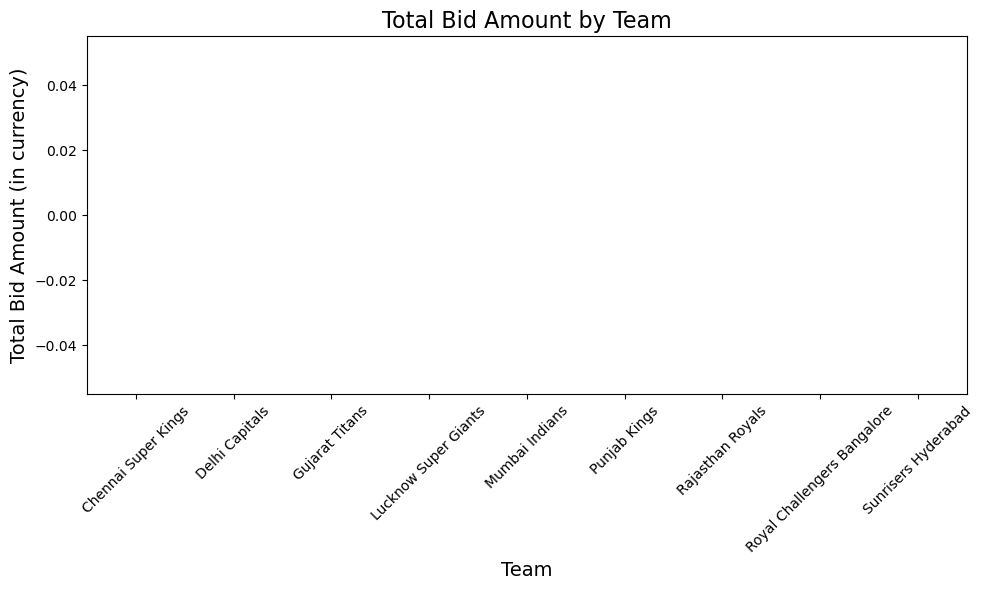

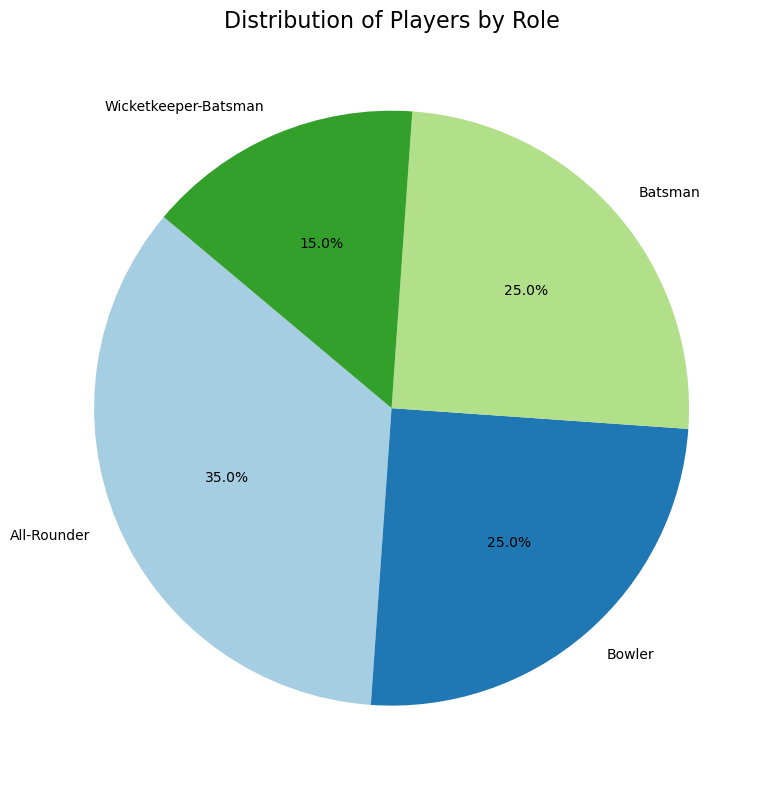

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df_json = pd.DataFrame(players_data)

df_json['Bid Amount'] = pd.to_numeric(df_json['Bid Amount'], errors='coerce')

team_bid_data = df_json.groupby('Team')['Bid Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
team_bid_data.plot(kind='bar', color='skyblue')
plt.title('Total Bid Amount by Team', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Total Bid Amount (in currency)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

role_distribution = df_json['Role'].value_counts()

plt.figure(figsize=(8, 8))
role_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Players by Role', fontsize=16)
plt.ylabel('') 
plt.tight_layout()
plt.show()


In [27]:
text_file = 'ipl_auction_data.txt'
with open(text_file, 'r') as file:
    text_data = file.readlines()

for line in text_data:
    print(line.strip())

Player: Rohit Sharma
Age: 36
Role: Batsman
Base Price: 2 crore
Auction: Bought by Mumbai Indians for 16 crore after fierce bidding.
Career Highlights: Indian captain, most IPL titles as a captain.

Player: Glenn Maxwell
Age: 35
Role: All-Rounder
Base Price: 2 crore
Auction: Acquired by Royal Challengers Bangalore for 12 crore.
Career Highlights: Explosive Australian all-rounder, versatile player.

Player: Mohammed Shami
Age: 34
Role: Bowler
Base Price: 1.5 crore
Auction: Snapped up by Gujarat Titans for 9 crore.
Career Highlights: India's spearhead fast bowler, swing expert.

Player: Quinton de Kock
Age: 31
Role: Wicketkeeper-Batsman
Base Price: 2 crore
Auction: Secured by Lucknow Super Giants for 8 crore.
Career Highlights: South African star, consistent IPL performer.

Player: Ravindra Jadeja
Age: 35
Role: All-Rounder
Base Price: 2 crore
Auction: Retained by Chennai Super Kings for 16 crore.
Career Highlights: Premier all-rounder, key to CSK’s success.

Player: Kane Williamson
Age: 3

## Summary of Analysis
- The JSON data provides structured insights on players.
- The plain text data allows for basic analysis like role distribution.
- Combining both formats enables a richer analysis pipeline.

In [21]:
from collections import Counter
roles = [line.split(': ')[1] for line in text_data if line.startswith('Role:')]
role_counts = Counter(roles)
role_counts

Counter({'Batsman\n': 10,
         'All-Rounder\n': 13,
         'Bowler\n': 11,
         'Wicketkeeper-Batsman\n': 6})

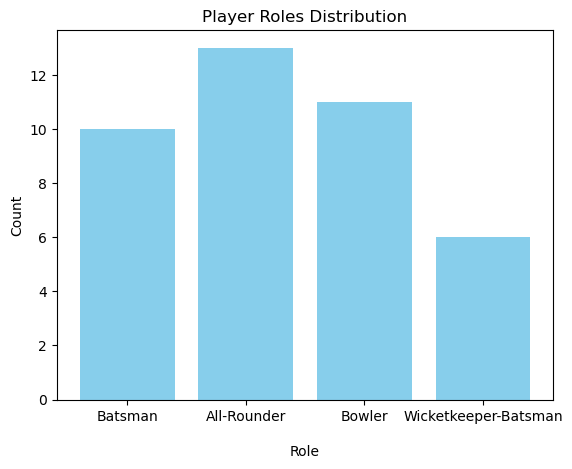

In [22]:
import matplotlib.pyplot as plt

plt.bar(role_counts.keys(), role_counts.values(), color='skyblue')
plt.title('Player Roles Distribution')
plt.xlabel('Role')
plt.ylabel('Count')
plt.show()